In [2]:
%matplotlib inline
from autoreduce import *
import numpy as np
from sympy import symbols

In [3]:
n = 8 # Number of states 
x_init = np.zeros(n)
x_init[6] = 100
x_init[7] = 500
timepoints_ode = np.linspace(0, 40, 100)
error_tol = 1000
nstates_tol = 5
#      x = 0, T1, 1, A1, 2, S1, 3, S2, 4, T2, 5, A2, 6, C1, 7, C2
#      P = 0, beta_S1, 1, l_S1, 2, K_S1, 3, kb, 4, beta_S2, 5, l_S2, 6,
#      K_S2, 7, beta_lac, 8, l_lac, 9, K_lac, 10, beta_tet, 11, l_tet, 12,
#      K_tet, 13, kc, 14, C_max, 15, dc, 16, 17, I, 18, atc, 20,K_tox
P = np.zeros(22)
P[0] = 6
P[1] = 2e-3
P[2] = 430
P[3] = 30
P[4] = 6
P[5] = 2e-3
P[6] = 190
P[7] = 19.8e-3
P[8] = 1.5e-3
P[9] = 1.4e5
P[10] = 14.4e-3
P[11] = 2.1e-4
P[12] = 13
P[13] = 0.6
P[14] = 5500
P[15] = 0.8
P[16] = 1e6 #17 -> 16
P[17] = 324 # 19 -> 17
P[18] = 1 #20 -> 18
P[19] = 0.1 #21 -> 19
P[20] = 1.5 #22 -> 20
P[21] = 0.5 #23 ->21
params_values = P.copy()

params = P
n = 8
x, f, P = system.load_ODE_model(n, len(params_values))

beta_S1 = symbols('beta_S1')
l_S1 = symbols('l_S1')
K_S1 = symbols('K_S1')
kb = symbols('kb')
beta_S2 = symbols('beta_S2')
l_S2 = symbols('l_S2')
K_S2 = symbols('K_S2')
beta_lac = symbols('beta_lac')
l_lac = symbols('l_lac')
K_lac = symbols('K_lac')
beta_tet = symbols('beta_tet')
l_tet = symbols('l_tet')
K_tet = symbols('K_tet')
kc = symbols('kc')
C_max = symbols('C_max')
dc = symbols('dc')
I = symbols('I')
atc = symbols('atc')
K_tox = symbols('K_tox')
d = symbols('d')
d_T = symbols('d_T')
d_S = symbols('d_S')
P = [beta_S1, l_S1, K_S1, kb, beta_S2, l_S2, K_S2, beta_lac, l_lac, 
    K_lac, beta_tet, l_tet, K_tet, kc, C_max, dc, I,
    atc, K_tox, d, d_T, d_S]
y0 = symbols('y0')
y1 = symbols('y1')

# T1 and A1
f[0] = P[0]*(P[1] + x[2]**2/(P[2]+x[2]**2)) - P[3]*x[0]*x[1] - P[20] * x[0]
f[1] = 5*P[4]*(P[5] + x[3]**2/(P[6]+x[3]**2)) - P[20] * x[1] - P[3]*x[0]*x[1]


# f[0] = P[0]*(x[2]**2/(P[2]+x[2]**2)) - P[3]*x[0]*x[1]
# f[1] = P[4]*(x[3]**2/(P[6]+x[3]**2)) - P[3]*x[0]*x[1]

#  S1 and S2 (scaled with cell count)
f[2] = P[7]*(P[8] + P[16]**2/(P[9]+P[16]**2))*x[6] - P[21] * x[2]
f[3] = P[10]*(P[11] + P[17]**2/(P[12]+P[17]**2))*x[7] - P[21] * x[3]

# f[2] = P[7]*(P[16]**2/(P[9]+P[16]**2))*x[6] - P[21] * x[2]
# f[3] = P[10]*(P[17]**2/(P[12]+P[17]**2))*x[7] - P[21] * x[3]

#  T2 and A2
f[4] = P[4]*(P[5] + x[3]**2/(P[6]+x[3]**2)) - P[3]*x[4]*x[5] - P[20] * x[4]
f[5] = 5*P[0]*(P[1] + x[2]**2/(P[2]+x[2]**2)) - P[20] * x[5]-P[3]*x[4]*x[5]

# f[4] = P[4]*(x[3]**2/(P[6]+x[3]**2)) - P[3]*x[4]*x[5] - P[20] * x[4]
# f[5] = P[0]*(x[2]**2/(P[2]+x[2]**2)) - P[20] * x[5]-P[3]*x[4]*x[5]

#  Cell 1 and Cell 2
f[6] = P[13]*(1 - (x[6] + x[7])/P[14])*x[6] - P[15]*x[6]*(x[0]/(P[18] + x[0])) - P[19] * x[6]
f[7] = P[13]*(1 - (x[6] + x[7])/P[14])*x[7] - P[15]*x[7]*(x[4]/(P[18] + x[4])) - P[19] * x[7]

C = np.zeros((2,len(x)), dtype=int)
C[0][6] = 1
C[1][7] = 1
C = C.tolist()

sys = System(x, f, params = P, params_values = params_values, C = C, x_init = x_init)

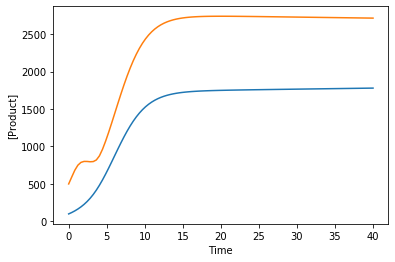

In [4]:
from autoreduce.utils import get_ODE
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
try:
    import matplotlib.pyplot as plt
    plt.plot(timepoints_ode, np.transpose(np.array(C)@sol))
    plt.xlabel('Time')
    plt.ylabel('[Product]')
    plt.show()
except:
    print('Plotting libraries missing.')

In [5]:
from autoreduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,5)
sys_ssm = get_SSM(sys, timepoints_ssm)
# Uncomment to run:
# Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)


In [11]:
# nouts = 2
# out_Ss = []
# for i in range(len(params)):
#     out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
# out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

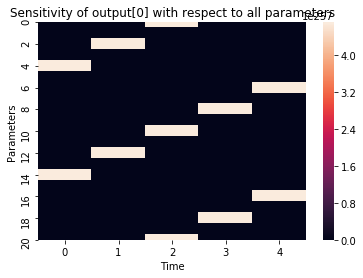

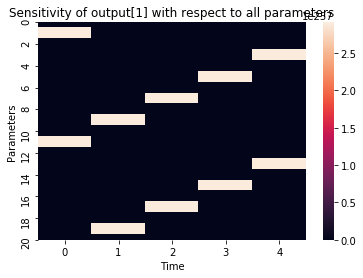

In [12]:
# try:
    # import seaborn as sn
    # for j in range(nouts):
    #     sn.heatmap(out_Ss[:,:,j].T)
    #     plt.xlabel('Time')
    #     plt.ylabel('Parameters')
    #     plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    #     plt.show()
# except:
#     print('Plotting libraries missing.')

In [6]:
from autoreduce.utils import get_reducible
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = get_reducible(sys, timepoints_ode, timepoints_ssm)
sys_reduce.nstates_tol = 4
sys_reduce.nstates_tol_min = 2
# results = sys_reduce.reduce_simple(skip_numerical_computations = True)

In [7]:
reduced_sys, collapsed_sys = sys_reduce.solve_timescale_separation([x[1], x[5], x[6], x[7]], debug = False)

Successful time-scale separation solution obtained with states: [x1, x5, x6, x7]!
